## Analysis
#### 1-  Cities of the type Urban have a relative lower Avg Fare compared to the rural cities. This can also be infered from the distances of each ride. Rides are longer  on the rural area since the desire locations are farther from the initial point of departure.
#### 2-  Number of drivers are lower in the Rural Cities. This could be due to the dense population in cities compared to rural cities, on the other hand, urban cities have a singnifcanlty higher number of drivers.
#### 3-  There seems to be an inverse relationship between the number of rides and the average fare, however the suburban cities have some intances where this asumption / analysis does not stand to be true.

In [81]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [82]:
plt.close("all")

# File to Load 
city_data_to_load = "raw_data/city_data.csv"
ride_data_to_load = "raw_data/ride_data.csv"

# Read City and Ride Data File and store into Pandas Data Frames
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# # Combine the data into a single dataset
city_ride_data_complete = pd.merge(city_data, ride_data, how="inner", on=["city", "city"])
# city_ride_data_complete

# Bubble Plot of Ride Sharing Data

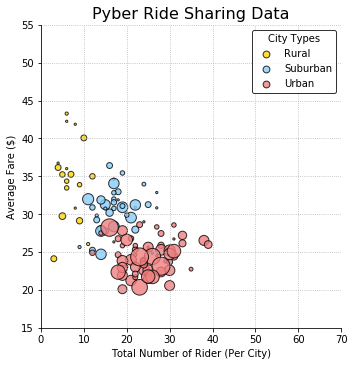

In [83]:

# Grouping by type and city and Calculating $ Displaying Average Fare, date, Total Number of Rides, Total Number of Drivers based on City

rides_analysis = city_ride_data_complete
rides_analysis['rides'] = 0 
rides_analysis['drivers'] = 0
rides_analysis = rides_analysis.groupby(['type','city']).agg({'fare':'mean'
                                   , 'ride_id':'size'
                                   ,'driver_count':'max'               
                                   ,'type':'min'})
rides_analysis = rides_analysis.rename(columns = {'fare' :'avg_fare'
                                 ,'rides' : 'Total Number of Rides'
                                 , 'driver_count' : 'Total Number of Drivers'
                                 , 'type' : 'City Type'
                                 ,'ride_id' : 'no_of_rides'
                                })
# rides_analysis

# Creates the scatter chart based upon the values above
sns.lmplot(x="no_of_rides",y="avg_fare",data=rides_analysis,fit_reg=False,hue="City Type",legend_out=False,
           size=5,scatter_kws={"s": size,'linewidths':1,'edgecolor':'black'},
           palette=dict(Rural="gold", Suburban="lightskyblue", Urban="lightcoral"))

# Setting the legend title, markerscale
plt.legend(title="City Types",loc="best",markerscale=0.5,edgecolor="black")

# Setting the grid style
plt.grid(linestyle="dotted")

# Setting the x_axis and y_axis limits
plt.xlim(0,70)
plt.ylim(15,55)

# Setting the title, x_axis and y_axis labels
plt.title("Pyber Ride Sharing Data", fontsize=16)
plt.xlabel("Total Number of Rider (Per City)")
plt.ylabel("Average Fare ($)")

# Saves files with equal axis
# plt.axis("equal")

# Saves file in the folder with the name and extention given
plt.savefig("images/Pyber Ride Sharing Data.png")

# Prints our scatter plot to the screen
plt.show()

# Making a pie of Total Fares by City Type

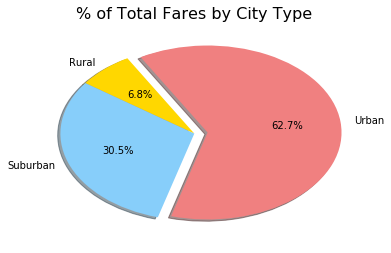

In [84]:
# Labels for the sections of our pie chart
city_ride_data_pie1 = city_ride_data_complete
labels = ["Rural","Suburban","Urban"]

# grouped on 'type' get values of each section of the pie chart based of fare
city_ride_data_pie1 = city_ride_data_pie1.groupby(['type']).agg({'fare':'sum'})

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Matplotlib seperates the "Python" section from the others
explode = (0,0,0.1)

# Creates the pie chart based upon the values above & automatically finding the percentages of each slice of the pie chart
plt.pie(city_ride_data_pie1, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)

# Saves files with equal axis
# plt.axis("equal")

# Saves file in the folder with the name and extention given
plt.savefig("images/% of Total Fares by City Type.png")

plt.title("% of Total Fares by City Type", fontsize=16)
# Prints our pie chart to the screen
plt.show()


## Making a pie % of Total Rides by City Type

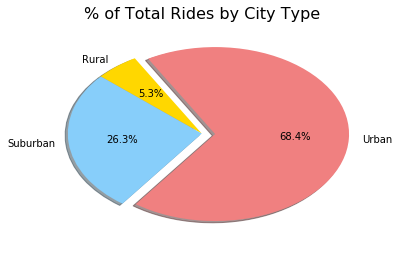

In [85]:
# Labels for the sections of our pie chart
city_ride_data_pie2 = city_ride_data_complete

labels = ["Rural","Suburban","Urban"]

# grouped on 'type' get values of each section of the pie chart based of ride_id
city_ride_data_pie2 = city_ride_data_pie2.groupby(['type']).agg({'ride_id':'size'})

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0,0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(city_ride_data_pie2, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=120)

# Saves files with equal axis
# plt.axis("equal")

# Saves file in the folder with the name and extention given
plt.savefig("images/% of Total Rides by City Type.png")

plt.title("% of Total Rides by City Type", fontsize=16)
# Prints our pie chart to the screen
plt.show()

## Making a pie % of Total Drivers by City Type

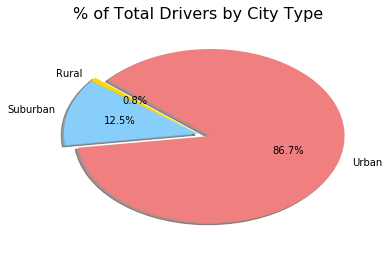

In [86]:
city_ride_data_pie3 = city_ride_data_complete

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# grouped on 'type' get values of each section of the pie chart based of driver_count
city_ride_data_pie3 = city_ride_data_pie3.groupby(['type']).agg({'driver_count':'sum'})


# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0,0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(city_ride_data_pie3, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("off")

plt.title("% of Total Drivers by City Type", fontsize=16)

# Saves files with equal axis
# plt.axis("equal")

plt.savefig("images/% of Total Drivers by City Type.png")

# Prints our pie chart to the screen
plt.show()
